In [139]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11

In [141]:
X = df.drop('Average', axis = 1)
y = df['Average']

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)


In [143]:
SupportVectorRegModel = SVR()
SupportVectorRegModel.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [144]:
y_pred = SupportVectorRegModel.predict(x_test)
y_pred

array([-74.04738125, -74.06095169, -73.9841801 , -74.03478127,
       -74.73831309, -75.23711091, -75.1440453 , -75.02213182,
       -74.65242046, -74.32358767, -74.52679227, -74.53861377,
       -74.6651208 , -74.98263682, -74.4189718 , -74.66092895,
       -75.24630763, -74.57913438, -74.44175036, -74.44175036,
       -73.86597739, -74.25433831, -73.95019558, -73.98281616,
       -76.38146662, -73.62625864, -73.40020903, -73.33257898,
       -73.04410782, -73.04410782, -73.69164114, -73.69164114,
       -73.61496067, -73.38924962, -73.53982105, -73.48173545,
       -74.15116581, -74.21578438, -73.82865085, -73.68072431,
       -73.68072431, -73.60496123, -73.5494031 , -73.40731231,
       -73.14142611, -73.61152357, -72.6251876 , -72.80995517,
       -72.6737361 , -72.14931946, -72.48276752, -72.31921582,
       -72.34807105, -75.2231493 , -72.6676385 , -72.33486811,
       -72.9277597 , -72.77603915, -72.98456234, -72.77603915,
       -72.6446985 , -72.78514725, -73.09272679, -72.78

In [145]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.3632660781710827

In [146]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
496,-74.090909,-74.047381
497,-74.181818,-74.060952
498,-74.090909,-73.984180
499,-74.181818,-74.034781
500,-75.000000,-74.738313
...,...,...
615,-70.363636,-71.076821
616,-70.181818,-70.987778
617,-70.454545,-71.139761
618,-70.363636,-71.114981


In [147]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.2971369976722368
Mean Squared Error: 0.13196224354979916
Root Mean Squared Error: 0.3632660781710827


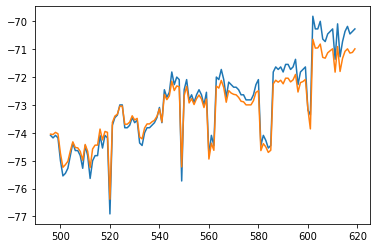

In [148]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.show()

In [ ]:
#This data is collected within x time, within 1 hour. Y Gb was occupied according to the size of the data. At k